In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [7]:
df = load_iris()
X = df.data
y = df.target

In [8]:
y = pd.get_dummies(y).values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state = 5)

In [18]:
input_size = 4
output_size = 3
hidden_size = 2
learning_rate = 0.1
iterations = 1000
res = pd.DataFrame(columns = ["mse", "accuracy"])

In [19]:
np.random.seed(20)
W1 = np.random.normal(scale = 0.5, size=(input_size, hidden_size))
W2 = np.random.normal(scale = 0.5, size=(hidden_size, output_size))

In [20]:
def sigmoid(x):
  y = 1/(1+np.exp(-x))
  return y

def MSE(y, y_pred):
  return ((y_pred - y)**2).sum() / y_pred.size

def accuracy(y, y_pred):
  acc = y_pred.argmax(axis = 1) == y.argmax(axis = 1)
  return acc.mean()

In [21]:
for i in range(iterations):
  Z1 = np.dot(X_train, W1)
  A1 = sigmoid(Z1)
  Z2 = np.dot(A1, W2)
  A2 = sigmoid(Z2)
  mse = MSE(y_train, A2)
  acc = accuracy(y_train, A2)
  df1 = pd.DataFrame({"mse": [mse], "accuracy":[acc]})
  res = pd.concat([res, df1], ignore_index=True)

  E1 = A2 - y_train
  dW1 = E1*A2*(1 - A2)
  E2 = np.dot(dW1, W2.T)
  dW2 = E2*A1*(1 - A1)

  newW2 = np.dot(A1.T, dW1) / len(y_train)
  newW1 = np.dot(X_train.T, dW2) / len(y_train)
  W2 -= learning_rate * newW2
  W1 -= learning_rate * newW1

  if i % 500 == 0:
    print(f"iteration {i}: MSE = {mse}, Accuarcy = {acc}")

iteration 0: MSE = 0.263262235106012, Accuarcy = 0.33076923076923076
iteration 500: MSE = 0.16583015636641582, Accuarcy = 0.9307692307692308


In [23]:
print("mse = ",mse)
print("accuracy = ", acc)

mse =  0.12969462961684008
accuracy =  0.6923076923076923


In [24]:
print("W1 = \n",W1)
print("W2 = \n",W2)
print("Z1 = \n",Z1)
print("Z2 = \n",Z2)

W1 = 
 [[ 0.54239187  0.23467134]
 [ 0.76850239 -1.43821525]
 [-1.66070836  1.13607788]
 [-0.07083633 -0.10713217]]
W2 = 
 [[ 1.63163255 -1.2184774  -1.75366328]
 [-2.13006746 -0.04507269  0.08012882]]
Z1 = 
 [[-1.27447061  1.80898824]
 [-3.8247095   3.61051939]
 [ 3.21142499 -2.39390795]
 [-2.90483568  3.28790168]
 [-1.55797318  1.51756797]
 [-3.15432101  2.45221628]
 [-1.53306983  2.0763201 ]
 [-1.74659449  1.79840048]
 [-2.36690124  2.44939   ]
 [-3.83176895  3.5997832 ]
 [ 2.87253317 -2.00949319]
 [-1.98388133  2.38706683]
 [-0.79367736  1.46705395]
 [ 3.26564662 -2.37042819]
 [-1.64845799  2.22933352]
 [ 2.90752212 -2.00274286]
 [ 2.70086319 -2.1061478 ]
 [-3.81044862  4.17450766]
 [ 3.22012181 -2.41462324]
 [-3.03348335  2.6731973 ]
 [-3.38260277  3.06709798]
 [-1.59588168  2.03087478]
 [ 3.10831668 -2.27758214]
 [ 3.01377114 -2.47109754]
 [-2.06786356  2.56280291]
 [-2.58376032  2.68727775]
 [-1.57545393  1.68009618]
 [-3.44399045  3.07556288]
 [-4.1850203   3.71628051]
 [ 2.703

Axes(0.125,0.11;0.775x0.77)


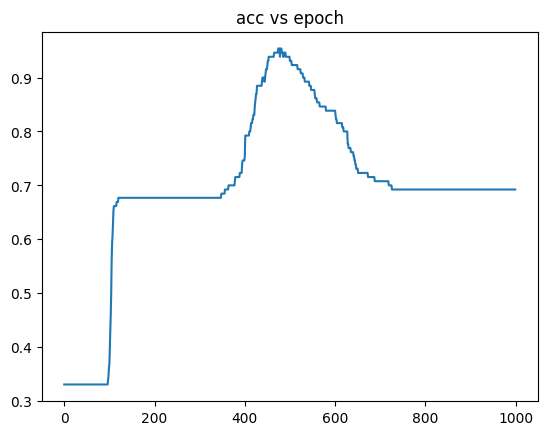

In [25]:
print(res.accuracy.plot(title ="acc vs epoch"))

Axes(0.125,0.11;0.775x0.77)


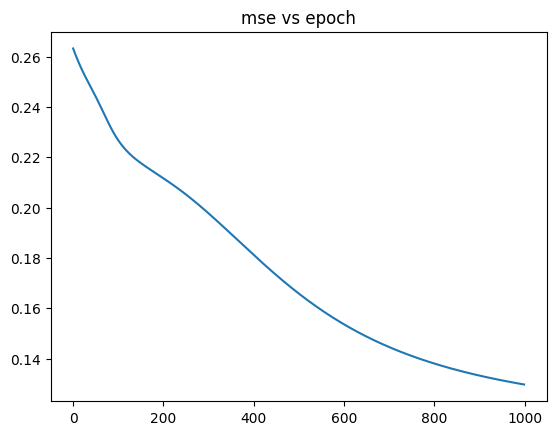

In [26]:
print(res.mse.plot(title = "mse vs epoch"))

In [28]:
Z1_test = np.dot(X_test, W1)
A1_test  = sigmoid(Z1_test)
Z2_test = np.dot(A1_test, W2)
A2_test = sigmoid(Z2_test)

In [29]:
print("acc = ",accuracy(y_test, A2_test))
print("mse = ",MSE(y_test, A2_test))

acc =  0.85
mse =  0.12662532071876703
